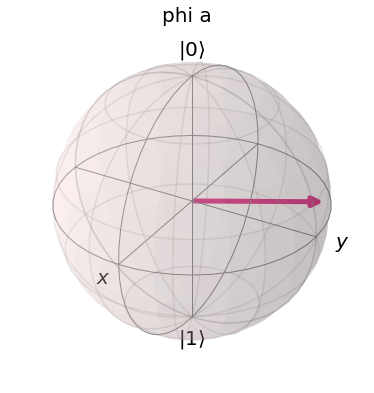

In [343]:
import numpy as np
import math

from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ, Aer

from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit.quantum_info import partial_trace




bloch_vector = [math.sin(math.pi*0.537)*math.cos((8/11)*math.pi), math.sin(math.pi*0.537)*math.sin((8/11)*math.pi), math.cos(math.pi*0.537)] 
plot_bloch_vector(bloch_vector, title= "phi a")


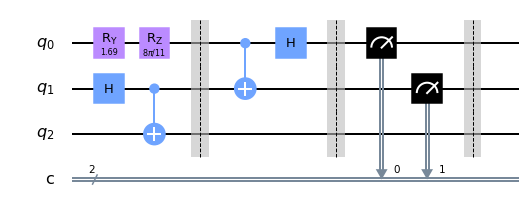

In [336]:
### parte 1

qc = QuantumCircuit(3,2)

qc.ry(math.pi*(0.537),0)
qc.rz(math.pi*(8/11),0)

qc.h(1)
qc.cx(1, 2)
qc.barrier()

# protocolo
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# medir os qubits
qc.measure([0,1], [0,1])



#qc.cx(1, 2)
#qc.cz(0, 2)
qc.barrier()

qc.draw(output='mpl')


In [337]:
rho_q2 = partial_trace(statevector,[0,1])

In [338]:
rho_q2.data

array([[0.44201133+0.j        , 0.32522082+0.37532483j],
       [0.32522082-0.37532483j, 0.55798867+0.j        ]])

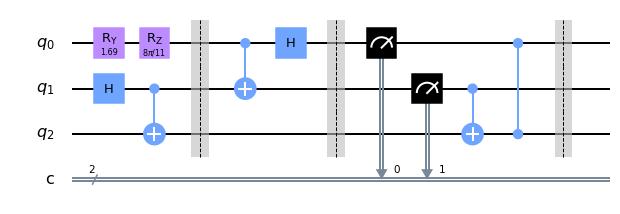

In [339]:
### parte 1

qc = QuantumCircuit(3,2)

qc.ry(math.pi*(0.537),0)
qc.rz(math.pi*(8/11),0)

qc.h(1)
qc.cx(1, 2)
qc.barrier()

# protocolo
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# medir os qubits
qc.measure([0,1], [0,1])



qc.cx(1, 2)
qc.cz(0, 2)
qc.barrier()

qc.draw(output='mpl')


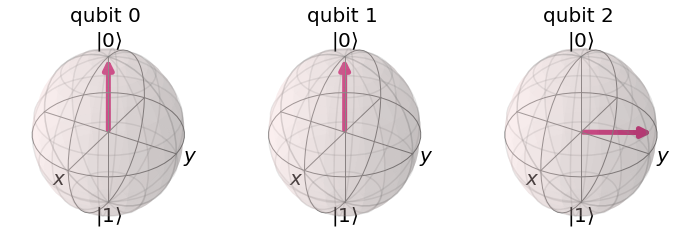

In [340]:
backend = BasicAer.get_backend('statevector_simulator')
statevector = execute(qc, backend, shots=10000).result().get_statevector()



plot_bloch_multivector(statevector)

In [341]:
rho_q2 = partial_trace(statevector,[0,1])

In [342]:
rho_q2.data

array([[ 0.44201133+0.j        , -0.32522082-0.37532483j],
       [-0.32522082+0.37532483j,  0.55798867+0.j        ]])